# ML-Fundamentals - Neural Networks - Exercise: Minimal Fully Connected Network for MNIST

## Table of Contents
* [Requirements](#Requirements) 
  * [Modules](#Python-Modules) 
  * [Data](#Data)
* [Simple MNIST Network](#Simple-MNIST-Network)
  * [Todo: Transparency](#Todo:-Transparency)
  * [Todo: Comprehension](#Todo:-Comprehension)
  * [Todo: Step towards a NN-Framework](#Todo:-Step-towards-a-NN-Framework)

# Requirements


## Python-Modules

In [1]:
# third party
import numpy as np
import matplotlib.pyplot as plt

# internal
from deep_teaching_commons.data.fundamentals.mnist import Mnist

## Data

In [2]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(one_hot_enc=True, normalized=True)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
mnist data directory already exists, download aborted


# Simple MNIST Network
The presented network is an adaptation of Michael Nielson's introductory example to neural networks. It is recommended, though not necessary, to read the first two chapters of his great online book ['Neural Networks and Deep Learning'](http://neuralnetworksanddeeplearning.com/) for a better understanding of the given example. Compared to the [original](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) by Nielsen, the present variant was vectorized and the sigmoid activation function replaced by a rectified linear unit function (ReLU). As a result, the code is written much more compact, and the optimization of the model is much more efficient. 

## Todo: Transparency
Your goal is to understand how the implementation works. Therefore your tasks are as follows:
  - (2) Add comments to functions and lines of code. Follow the [Google-Pyhton](https://google.github.io/styleguide/pyguide.html) guidelines for comments.
  - (2) Add a verbose argument (`boolean`) to the functions that adds meaningful `print` lines to the network, if it is `true`.
  - (2) Add a variable `delta_hist` which store the delta value calculated on the output layer during each iteration of the function `grads(X,Y,weights)`. After the optimization process plot `delta_hist`.

Epoch: 0 Accuracy: 0.9451
Epoch: 1 Accuracy: 0.9581
Epoch: 2 Accuracy: 0.9625
Epoch: 3 Accuracy: 0.965
Epoch: 4 Accuracy: 0.9687
Epoch: 5 Accuracy: 0.9698
Epoch: 6 Accuracy: 0.9709
Epoch: 7 Accuracy: 0.972
Epoch: 8 Accuracy: 0.9728
Epoch: 9 Accuracy: 0.9734
Epoch: 10 Accuracy: 0.9738
Epoch: 11 Accuracy: 0.9746
Epoch: 12 Accuracy: 0.9759
Epoch: 13 Accuracy: 0.9761
Epoch: 14 Accuracy: 0.9764
Epoch: 15 Accuracy: 0.9763
Epoch: 16 Accuracy: 0.9765
Epoch: 17 Accuracy: 0.9765
Epoch: 18 Accuracy: 0.9762
Epoch: 19 Accuracy: 0.9768
Epoch: 20 Accuracy: 0.9768
Epoch: 21 Accuracy: 0.9768
Epoch: 22 Accuracy: 0.9776
Epoch: 23 Accuracy: 0.9779
Epoch: 24 Accuracy: 0.9782


(-0.9063529186074328, 0)

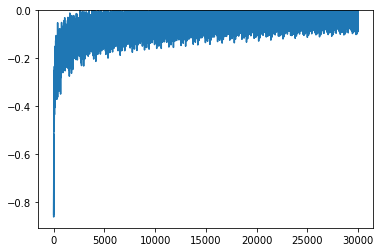

In [13]:
delta_hist =[]

def feed_forward(X, weights):
    """Preforms the forward pass.
    
    Retrieves the inputs and the weights.
    And does a matrix multiplication
    
    
        Args:
            X: A batch of inputs
            weights: The weights
            
        Returns:
            A batch of calculated outputs
        
    """
    
    a = [X]
    for w in weights:
        a.append(np.maximum(a[-1].dot(w),0))
    return a

def grads(X, Y, weights, verbose = False):
    """Calculates the gradiants and preforms the backpropagation
    
    This function calculates the gradiants and passes the 
    new weights together with the inputs to forward pass.
    
        Args:
            X: A batch of inputs
            Y: A batch of labels
            weights: weights to calculate the new gradient
            vorbose: prints the loss in each iteration
        
        Returns:
            The new gradients

    """
    grads = np.empty_like(weights)
    a = feed_forward(X, weights)
    # https://brilliant.org/wiki/backpropagation/ or https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications
    delta = a[-1] - Y
    
    if verbose:
        print("Loss:", np.sum(delta*Y)/len(X))
    
    delta_hist.append(np.sum(delta*Y)/len(X))
    grads[-1] = a[-2].T.dot(delta)
    for i in range(len(a)-2, 0, -1):
        delta = (a[i] > 0) * delta.dot(weights[i].T)
        grads[i-1] = a[i-1].T.dot(delta)
        
    return grads / len(X)

trX, trY, teX, teY = train_images, train_labels, test_images, test_labels
weights = [np.random.randn(*w) * 0.1 for w in [(784, 200), (200,100), (100, 10)]]
num_epochs, batch_size, learn_rate = 25, 50, 0.1

for i in range(num_epochs):
    for j in range(0, len(trX), batch_size):
        X, Y = trX[j:j+batch_size], trY[j:j+batch_size]
        weights -= learn_rate * grads(X, Y, weights)
        once = False
        
    prediction_test = np.argmax(feed_forward(teX, weights)[-1], axis=1)
    print ('Epoch:', i, 'Accuracy:', np.mean(prediction_test == np.argmax(teY, axis=1)))
    
plt.plot(delta_hist)
plt.ylim(ymax = 0, ymin= -1)

## Todo: Comprehension
Hopefully, this implementation of a neural network is clear now. As a check answer the following questions (a few sentences, no novels):
  - (2) Which cost function is used, what is its derivation and how is it implemented?
  - (2) Why are the boundaries of your plot between [-1,0], why it is so noisy, how do you can reduce the noice and what is the difference to a usual plot of a loss function?
      - Usually the loss is positive, so the whole plot wouln't be in between -1 and 0.
  - (2) How does the network implement the backpropagation algorithm?

## Todo: Step towards a NN-Framework
The presented implementation is compact and efficient, but hard to modify or extend. However, a modular design is crucial if you want to experiment with a neural network to understand the influence of its components. Now you make the first changes towards your own 'toy-neural-network-framework', which you should expand in the progress of exercise 03. 

(5) Rework the implementation from above given the classes and methods below. Again, you _do not_ have to re-engineer the whole neural network at this step. Rework the code to match the given specification and do necessary modifications only. For your understanding, you can change the names of the variables to more fitting ones.

In [4]:
class FullyConnectedNetwork:
    def __init__(self, layers):
        pass
        
    def forward(self, data):
        a = [X]
        for w in weights:
            a.append(np.maximum(a[-1].dot(w),0))
        return a

    def backward(self, X, Y):
        grads = np.empty_like(weights)
        a = feed_forward(X, weights)
        delta = a[-1] - Y

        if verbose:
            print("Loss:", np.sum(delta*Y)/len(X))

        delta_hist.append(np.sum(delta*Y)/len(X))
        grads[-1] = a[-2].T.dot(delta)
        for i in range(len(a)-2, 0, -1):
            delta = (a[i] > 0) * delta.dot(weights[i].T)
            grads[i-1] = a[i-1].T.dot(delta)

        return grads / len(X)


    def predict(self, data):
        return None
            
class Optimizer:
    def __init__(self, network, train_data, train_labels, test_data=None, test_labels=None, epochs=100, batch_size=20, learning_rate=0.01):
        raise NotImplementedError("This is your duty")
        
    def sgd(self):
        return None

    
# Following code should run:    
mnist_NN = FullyConnectedNetwork([(784, 200),(200,100),(100, 10)]) 
epochs, batch_size, learning_rate = 20, 500, 0.1
Optimizer(mnist_NN, train_images, train_labels, test_images, test_labels, epochs, batch_size, learning_rate)
plt.plot(mnist_NN.delta_hist)

NotImplementedError: This is your duty